<a href="https://colab.research.google.com/github/husnulkhotimah-husnulkhotimah/Project-Data-Science/blob/main/Husnul_Khotimah_Demo_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding
Ranking Universitas sangat berdampak pada animo calon mahasiswa dan kualitas dari student di universitas tersebut. Selain itu, ranking universitas serta kualitas student sangat dipertimbangkan oleh pakar pendidikan untuk memberikan apresiasi baik bagi universitas maupun bagi student. Pada akhirnya, perusahaan juga sangat mempertimbangkan hal tersebut dalam proses perekrutan karyawan.


#Data Understanding
Output yang diharapkan adalah prediksi ranking universitas pada tahun 2023. Dataset yang dibutuhkan adalah data ranking universitas pada beberapa tahun kebelakang secara lengkap dan akurat serta performa student.

Dataset : https://drive.google.com/drive/folders/1wFaXYyO61DC0EERFMk0Fh5A__JLgFyvY

#Data Preparation

## Import Library

In [ ]:
import pandas as pd
import os
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

##Tahun 2018

### Read Data

In [ ]:
df2018 = pd.read_csv('/content/2018-University-Rankings.csv')

In [ ]:
df2018 = df2018.rename(columns={'institution' : 'university'})

In [ ]:
df2018

,rank_2018,rank_2017,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,701+,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,701+,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,701+,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,701+,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df2018.drop(columns=['rank_2017'])

,rank_2018,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,6,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,5,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,1,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,22,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5,A,100,2,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,UTAH STATE UNIVERSITY,United States,L,CO,VH,5,A,-,-,...,-,-,-,-,-,-,-,-,-,-
891,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,-,...,-,-,-,-,-,-,-,-,-,-
892,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,4,A,-,-,...,-,-,-,-,-,-,-,-,-,-
893,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,-,...,-,-,-,-,-,-,-,-,-,-


## Tahun 2019

### Read Data

In [ ]:
df2019 = pd.read_csv('/content/2019-University-Rankings.csv')

In [ ]:
df2019 = df2019.rename(columns={'institution' : 'university'})

In [ ]:
df2019

,rank_2019,rank_2018,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,6,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,...,-,-,-,26.4,465,-,-,-,-,7.2 - 14.2
891,801-1000,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5,A,-,...,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2
892,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,...,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2
893,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,...,-,-,-,-,-,-,-,-,-,7.2 - 14.2


In [ ]:
df2019.drop(columns=['rank_2018'])

,rank_2019,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,3,...,4,100,17,99.8,8,100,41,95.5,77,100
1,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,5,...,5,100,16,99,13,99.8,56,70.5,190,98.6
2,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,1,...,1,99.3,40,99.8,9,92.1,151,75.7,164,98.5
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,98.7,21,...,72,100,4,100,5,96.8,115,90.3,103,97.2
4,5,UNIVERSITY OF OXFORD,United Kingdom,L,FC,VH,5,A,100,4,...,3,100,7,83,56,99.6,63,98.8,43,96.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,801-1000,VERONA UNIVERSITY,Italy,L,FC,HI,3,A,-,-,...,-,-,-,26.4,465,-,-,-,-,7.2 - 14.2
891,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5,A,-,-,...,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2
892,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4,A,-,-,...,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2
893,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4,A,-,-,...,-,-,-,-,-,-,-,-,-,7.2 - 14.2


## Tahun 2022

### Read Data

In [ ]:
df2022 = pd.read_csv('/content/2021-2022-University-Rankings.csv')

In [ ]:
df2022 = df2022.rename(columns={'institution' : 'university'})

In [ ]:
df2022

,rank_2022,rank_2021,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,...,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,801-1000,801-1000,"Vietnam National University, Hanoi",Vietnam,XL,FO,HI,3,A,-,...,-,-,-,-,-,-,-,-,-,9 - 14.1
884,801-1000,801-1000,Voronezh State University,Russia,L,CO,HI,5,A,-,...,-,37.3,420,-,-,-,-,16.3,580,9 - 14.1
885,801-1000,801-1000,Vytautas Magnus University,Lithuania,M,FO,VH,4,A,-,...,-,-,-,-,-,17.4,583,-,-,9 - 14.1
886,801-1000,801-1000,Wroc?aw University of Science and Technology,Poland,L,FO,VH,5,A,-,...,-,26.3,564,-,-,-,-,-,-,9 - 14.1


## Tahun 2023

#### Read Data

In [ ]:
df2023 = pd.read_csv('/content/2023-University-Rankings.csv')

In [ ]:
df2023 = df2023.rename(columns={'institution' : 'university'})

In [ ]:
df2023

,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,employer_reputation_rank,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,4,100.0,14,100.0,5,100.0,54,90.0,109,100
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,2,100.0,11,92.3,55,100.0,60,96.3,70,98.8
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,5,100.0,6,99.9,9,99.8,74,60.3,235,98.5
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,3,100.0,8,90.0,64,98.8,101,98.4,54,98.4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,1,99.4,35,100.0,2,76.9,228,66.9,212,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Universidad Nacional Aut¢noma de Honduras (UNAH),Honduras,XL,FC,LO,5.0,A,4.6,501+,5.8,501+,3.6,601+,1.0,601+,1.7,601+,NaN,NaN,-
1418,Universidad Tecnol¢gica de Bol¡var,Colombia,M,FO,HI,4.0,B,3.0,501+,5.8,501+,2.4,601+,2.2,601+,9.3,601+,1.3,601+,-
1419,Universit Mohammed V de Rabat,Morocco,XL,CO,VH,3.0,A,2.8,501+,2.6,501+,3.2,601+,3.6,601+,5.2,601+,2.8,601+,-
1420,University of Craiova,Romania,L,CO,HI,4.0,A,3.3,501+,1.8,501+,2.7,601+,2.0,601+,NaN,NaN,NaN,NaN,-


### Outlier dan Heatmap


===MENGGUNAKAN HISTOGRAM =====


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'academic_reputation_score'}>,
        <Axes: title={'center': 'employer_reputation_score'}>],
       [<Axes: title={'center': 'faculty_student_score'}>,
        <Axes: title={'center': 'citations_score'}>,
        <Axes: title={'center': 'international_faculty_score'}>],
       [<Axes: title={'center': 'international_student_score'}>,
        <Axes: >, <Axes: >]], dtype=object)

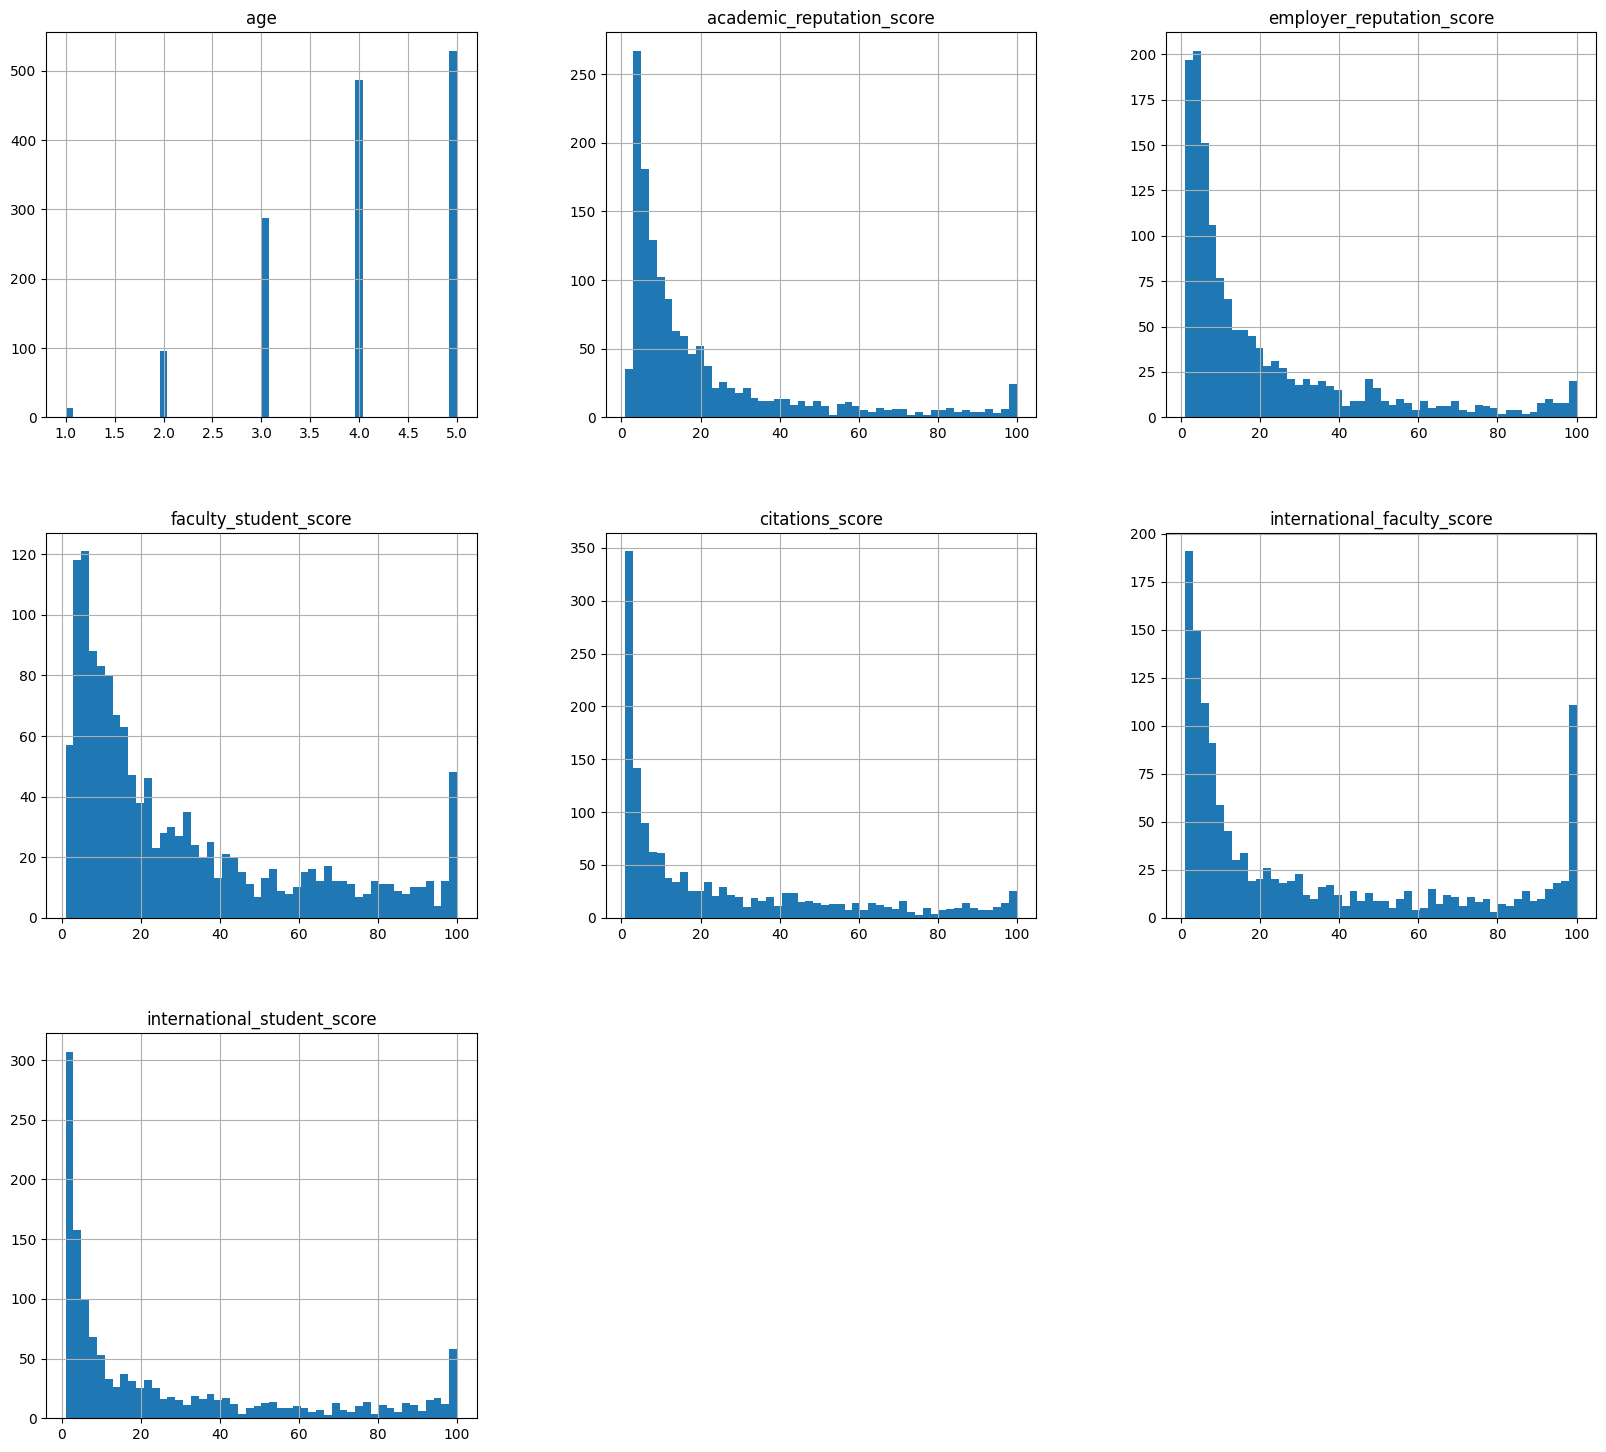

In [ ]:
#OUTLIER MENGGUNAKAN HISTOGRAM
print('===MENGGUNAKAN HISTOGRAM =====')
df2023.hist(bins=50, figsize=(20,18))

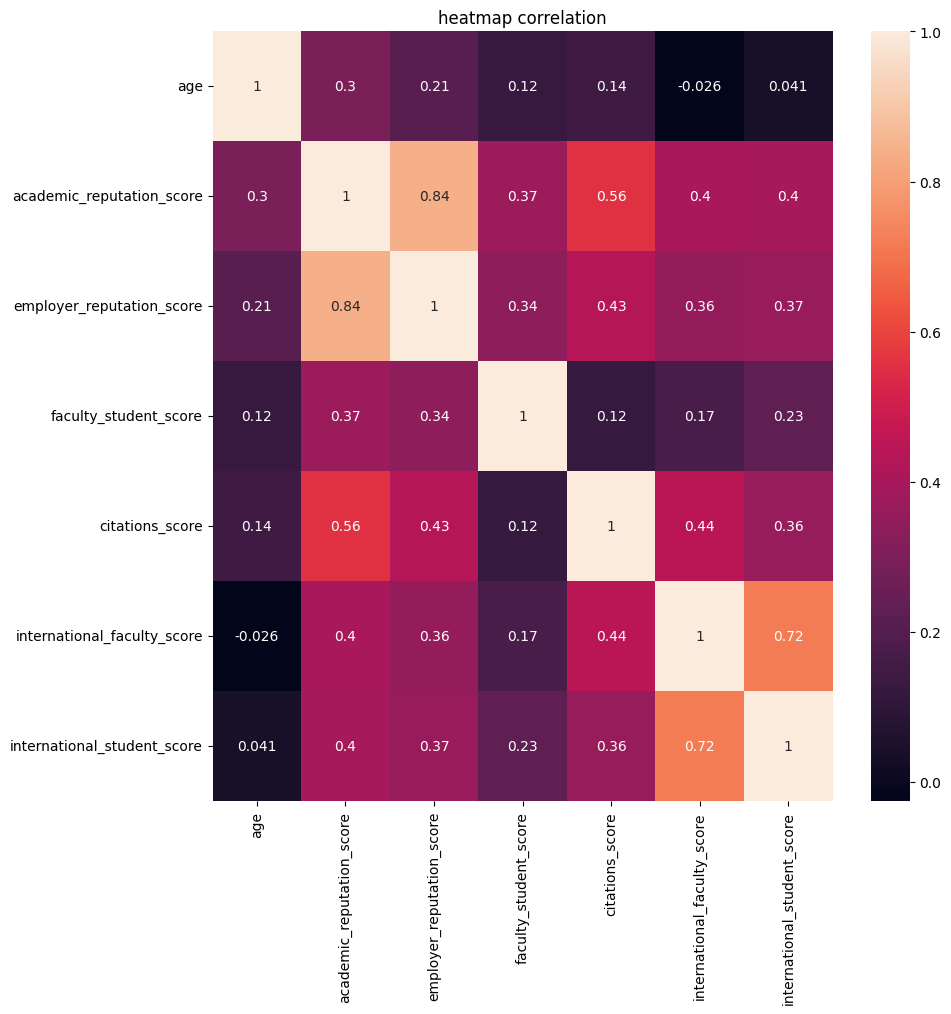

In [ ]:
plt.figure(figsize=(10,10))
plt.title('heatmap correlation')
sns.heatmap(df2023.corr(), annot=True)
plt.show()

In [ ]:
df2023.dropna(how="all", inplace=True)
df2023 = df2023[df2023 != '-'].dropna()

df2023['overall_score'] = df2023['overall_score'].fillna(0).astype("float").astype("int")

In [ ]:
df2023 = df2023.sort_values('overall_score', ascending=False)
df2023['rank_2023'] = range(1, len(df2023) + 1)

df2023

,university,country,classification,focus,research_intensity,age,status,academic_reputation_score,academic_reputation_rank,employer_reputation_score,...,faculty_student_score,faculty_student_rank,citations_score,citations_rank,international_faculty_score,international_faculty_rank,international_student_score,international_student_rank,overall_score,rank_2023
0,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5.0,B,100.0,5,100.0,...,100.0,14,100.0,5,100.0,54,90.0,109,100,1
2,Stanford University,United States,L,FC,VH,5.0,B,100.0,4,100.0,...,100.0,6,99.9,9,99.8,74,60.3,235,98,2
3,University of Oxford,United Kingdom,L,FC,VH,5.0,A,100.0,3,100.0,...,100.0,8,90.0,64,98.8,101,98.4,54,98,3
1,University of Cambridge,United Kingdom,L,FC,VH,5.0,A,100.0,2,100.0,...,100.0,11,92.3,55,100.0,60,96.3,70,98,4
4,Harvard University,United States,L,FC,VH,5.0,B,100.0,1,100.0,...,99.4,35,100.0,2,76.9,228,66.9,212,97,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Bond University,Australia,S,FC,HI,3.0,B,4.4,501+,6.3,...,45.8,338,16.4,601+,98.3,107,98.9,48,24,489
479,UNESP,Brazil,XL,FC,VH,3.0,A,37.0,230,23.5,...,19.1,601+,16.8,600,6.1,601+,2.3,601+,24,490
477,Ko University,Turkey,M,FC,HI,3.0,B,20.4,411,36.3,...,31.2,497,23.4,511,30.3,472,10.6,601+,24,491
476,Imam Abdulrahman Bin Faisal University (IAU) (...,Saudi Arabia,L,FC,HI,3.0,A,5.8,501+,3.7,...,81.8,125,2.0,601+,97.6,117,9.2,601+,24,492


### Top 3 Universitas

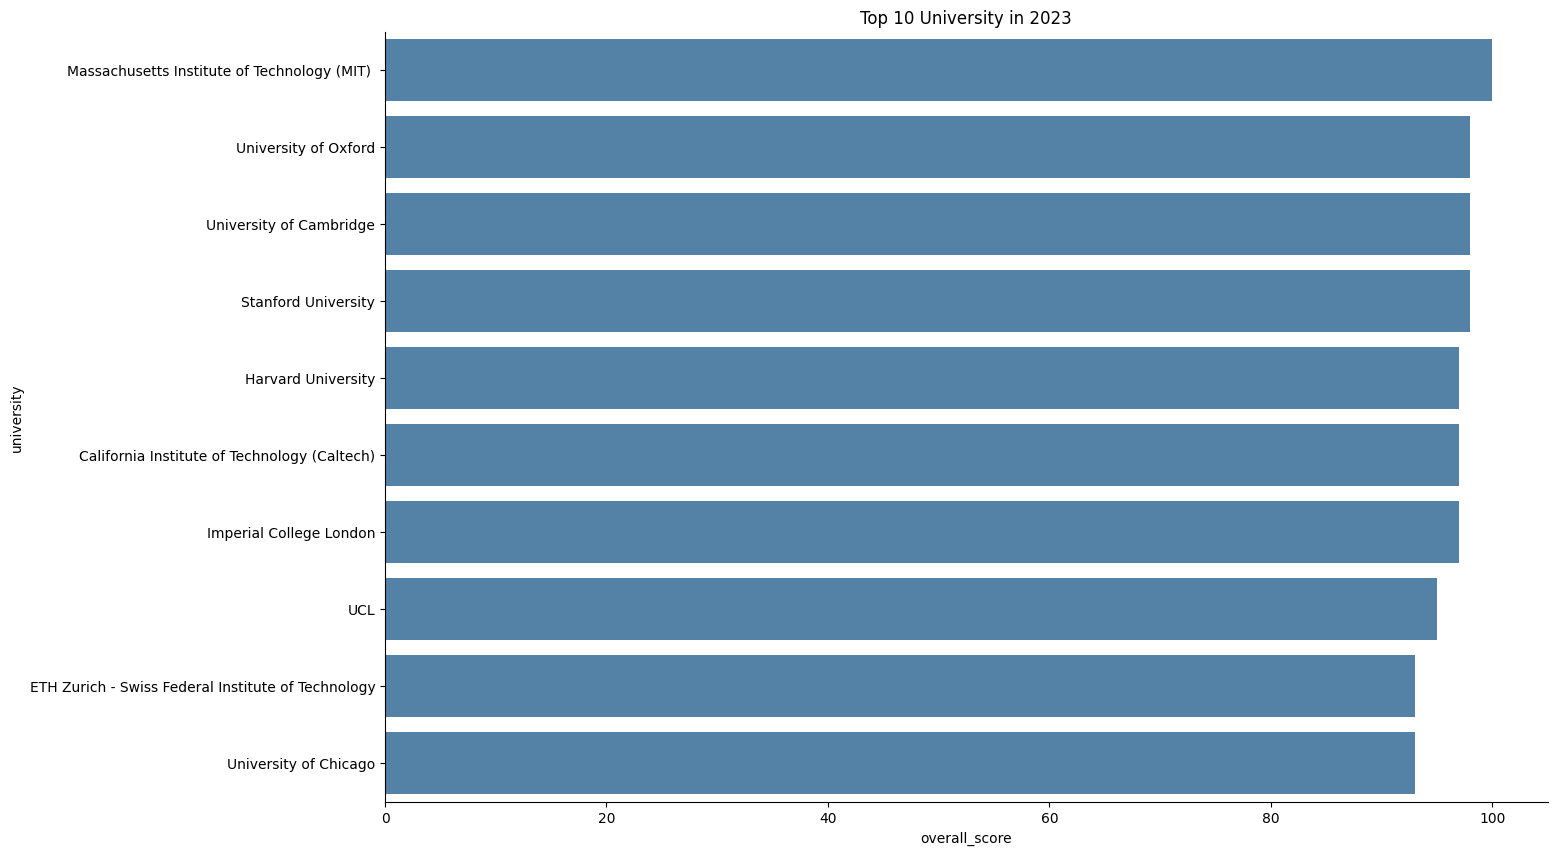

In [ ]:
univ = df2023.sort_values(by='overall_score', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 University in 2023')
sns.barplot(data=univ, x='overall_score', y='university',
            color='steelblue', )
sns.despine()
plt.show()

In [ ]:
Top = df2023.sort_values(by='overall_score', ascending=False).iloc[:3,0]

print('Top 3 Universitas :')
for i in Top :
  print('-',i)

print()

Top 3 Universitas :
- Massachusetts Institute of Technology (MIT) 
- University of Oxford
- University of Cambridge



###Bottom 3 Universitas

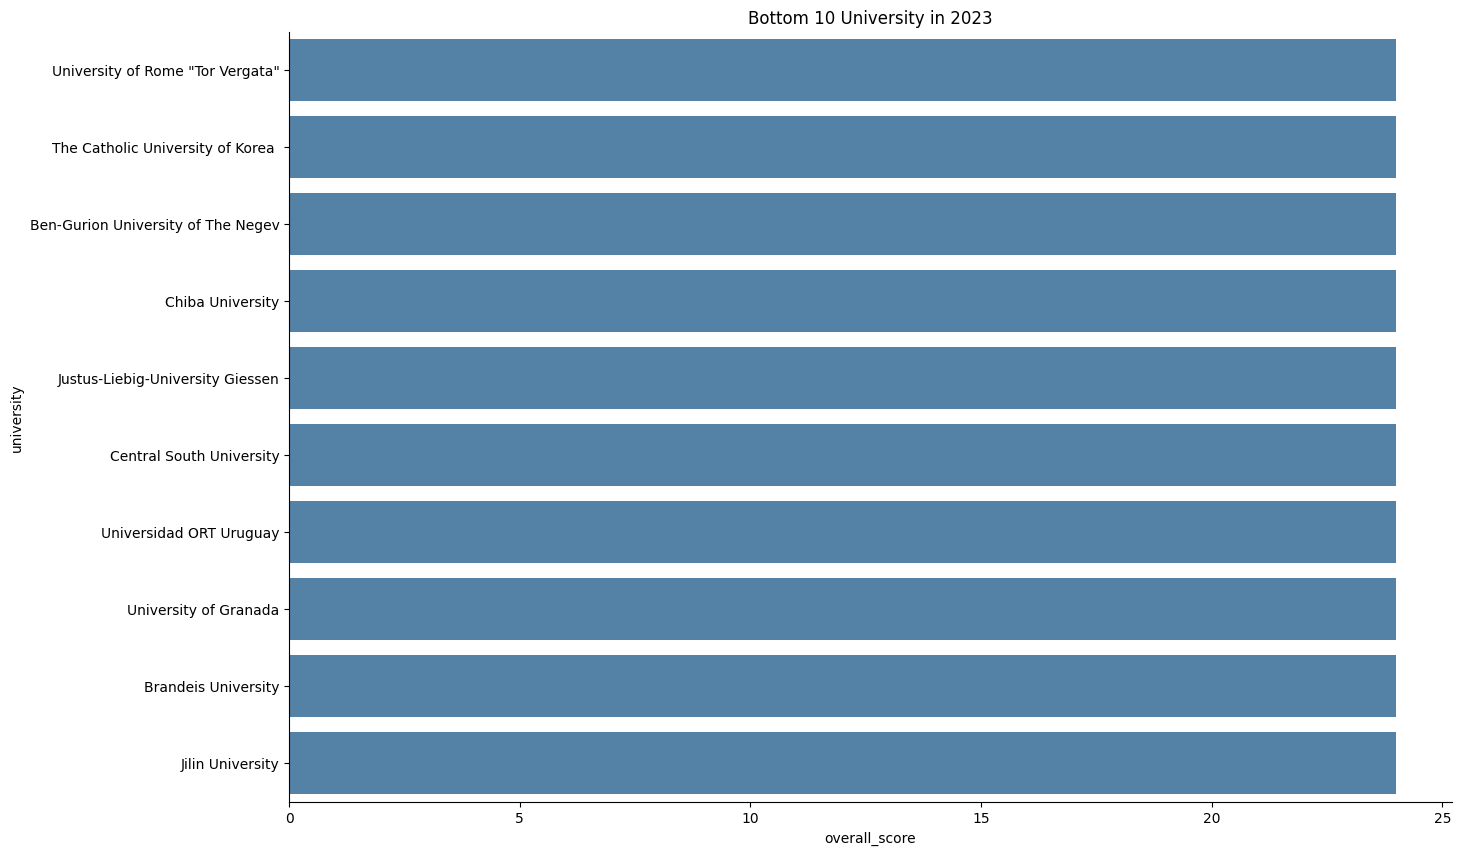

In [ ]:
univbottom = df2023.sort_values(by='overall_score', ascending=True).head(10)

plt.figure(figsize=(15,10))
plt.title('Bottom 10 University in 2023')
sns.barplot(data=univbottom, x='overall_score', y='university',
            color='steelblue', )
sns.despine()
plt.show()

In [ ]:
Bottom = df2023.sort_values(by='overall_score', ascending=True).iloc[:3,0]

print('Bottom 3 Universitas :')
for i in Bottom :
  print('-',i)

print()

Bottom 3 Universitas :
- University of Rome "Tor Vergata"
- The Catholic University of Korea 
- Ben-Gurion University of The Negev



## Penggabungan Dataframe Universitas

### Read Data

In [ ]:
df_new = pd.concat([df2023.set_index('university')['rank_2023'], df2018.set_index('university')['rank_2018'], df2019.set_index('university')['rank_2019'], df2022.set_index('university')[['rank_2021', 'rank_2022']]], axis=1, sort=False).reset_index()
df_new

,university,rank_2023,rank_2018,rank_2019,rank_2021,rank_2022
0,Massachusetts Institute of Technology (MIT),1.0,NaN,NaN,NaN,NaN
1,Stanford University,2.0,NaN,NaN,2,2
2,University of Oxford,3.0,NaN,NaN,5,4
3,University of Cambridge,4.0,NaN,NaN,6,7
4,Harvard University,5.0,NaN,NaN,3,3
...,...,...,...,...,...,...
2125,"Vietnam National University, Hanoi",NaN,NaN,NaN,801-1000,801-1000
2126,Voronezh State University,NaN,NaN,NaN,801-1000,801-1000
2127,Vytautas Magnus University,NaN,NaN,NaN,801-1000,801-1000
2128,Wroc?aw University of Science and Technology,NaN,NaN,NaN,801-1000,801-1000


### Check Null Values

In [ ]:
df_new.isna().sum()

university       0
rank_2023     1637
rank_2018     1235
rank_2019     1235
rank_2021     1242
rank_2022     1242
dtype: int64

Berdasarkan data tersebut, terdapat banyak sekali null values. Akan tetapi karena null values nya ini adalah data ranking, maka sementara data dirubah ke 0 terlebih dahulu (sebagai perbandingan bahwa sebelumnya universitas tersebut tidak mengikuti salah satu atau bahkan kesleuruhan dari prosedur penilaian untuk menentukan peringkat universitas).

In [ ]:
df_new['rank_2018'] = df_new['rank_2018'].fillna(0)
df_new['rank_2019'] = df_new['rank_2019'].fillna(0)
df_new['rank_2021'] = df_new['rank_2021'].fillna(0)
df_new['rank_2022'] = df_new['rank_2022'].fillna(0)
df_new['rank_2022'] = df_new['rank_2022'].fillna(0)
df_new['rank_2023'] = df_new['rank_2023'].fillna(0)

df_new.isna().sum()

university    0
rank_2023     0
rank_2018     0
rank_2019     0
rank_2021     0
rank_2022     0
dtype: int64

In [ ]:
df_new = df_new.replace('=', '', regex=True)

In [ ]:
df_new[['rank_2018_1', 'rank_2018_2']] = df_new['rank_2018'].str.split('-', expand=True).astype(float).astype(int, errors='ignore')
df_new[['rank_2019_1', 'rank_2019_2']] = df_new['rank_2019'].str.split('-', expand=True).astype(float).astype(int, errors='ignore')
df_new[['rank_2021_1', 'rank_2021_2']] = df_new['rank_2021'].str.split('-', expand=True).astype(float).astype(int, errors='ignore')
df_new[['rank_2022_1', 'rank_2018_2']] = df_new['rank_2022'].str.split('-', expand=True).astype(float).astype(int, errors='ignore')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   university   2130 non-null   object 
 1   rank_2023    2130 non-null   float64
 2   rank_2018    2130 non-null   object 
 3   rank_2019    2130 non-null   object 
 4   rank_2021    2130 non-null   object 
 5   rank_2022    2130 non-null   object 
 6   rank_2018_1  895 non-null    float64
 7   rank_2018_2  403 non-null    float64
 8   rank_2019_1  895 non-null    float64
 9   rank_2019_2  405 non-null    float64
 10  rank_2021_1  888 non-null    float64
 11  rank_2021_2  398 non-null    float64
 12  rank_2022_1  888 non-null    float64
dtypes: float64(8), object(5)
memory usage: 216.5+ KB


In [ ]:
df_gabung = df_new[['university', 'rank_2018_1', 'rank_2019_1', 'rank_2021_1', 'rank_2022_1', 'rank_2023']]

df_gabung

,university,rank_2018_1,rank_2019_1,rank_2021_1,rank_2022_1,rank_2023
0,Massachusetts Institute of Technology (MIT),NaN,NaN,NaN,NaN,1.0
1,Stanford University,NaN,NaN,2.0,2.0,2.0
2,University of Oxford,NaN,NaN,5.0,4.0,3.0
3,University of Cambridge,NaN,NaN,6.0,7.0,4.0
4,Harvard University,NaN,NaN,3.0,3.0,5.0
...,...,...,...,...,...,...
2125,"Vietnam National University, Hanoi",NaN,NaN,801.0,801.0,0.0
2126,Voronezh State University,NaN,NaN,801.0,801.0,0.0
2127,Vytautas Magnus University,NaN,NaN,801.0,801.0,0.0
2128,Wroc?aw University of Science and Technology,NaN,NaN,801.0,801.0,0.0


###Check Outlier

===MENGGUNAKAN HISTOGRAM =====


array([[<Axes: title={'center': 'rank_2018_1'}>,
        <Axes: title={'center': 'rank_2019_1'}>],
       [<Axes: title={'center': 'rank_2021_1'}>,
        <Axes: title={'center': 'rank_2022_1'}>],
       [<Axes: title={'center': 'rank_2023'}>, <Axes: >]], dtype=object)

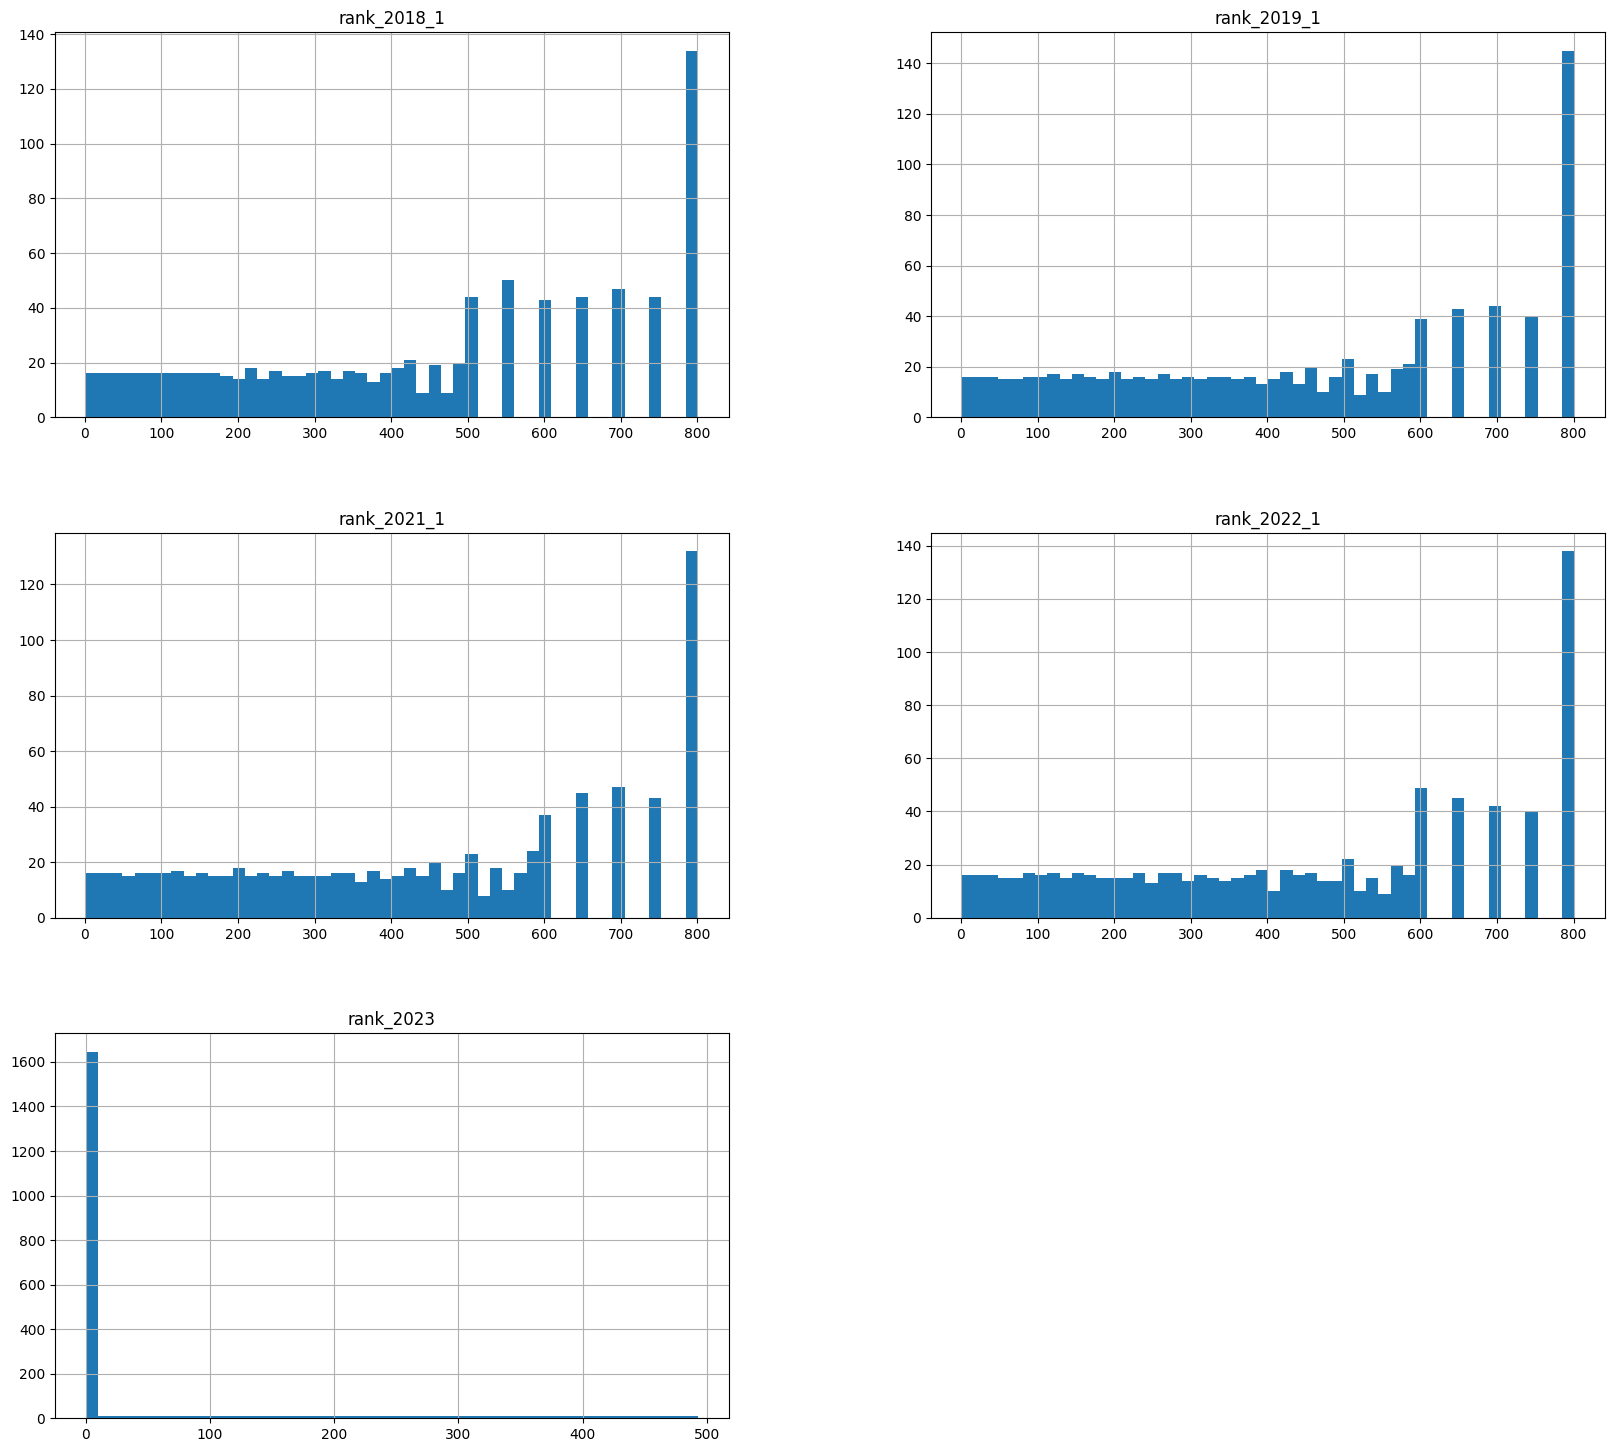

In [ ]:
#OUTLIER MENGGUNAKAN HISTOGRAM
print('===MENGGUNAKAN HISTOGRAM =====')
df_gabung.hist(bins=50, figsize=(20,18))

### Check Irregular values

In [ ]:
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   university   2130 non-null   object 
 1   rank_2018_1  895 non-null    float64
 2   rank_2019_1  895 non-null    float64
 3   rank_2021_1  888 non-null    float64
 4   rank_2022_1  888 non-null    float64
 5   rank_2023    2130 non-null   float64
dtypes: float64(5), object(1)
memory usage: 100.0+ KB


### Check Duplicate Values

In [ ]:
df_gabung.duplicated().sum()

0

Hasil tersebut menjelaskan bahwa tidak ada data duplicate yang melibatkan seluruh column.

###Heatmap

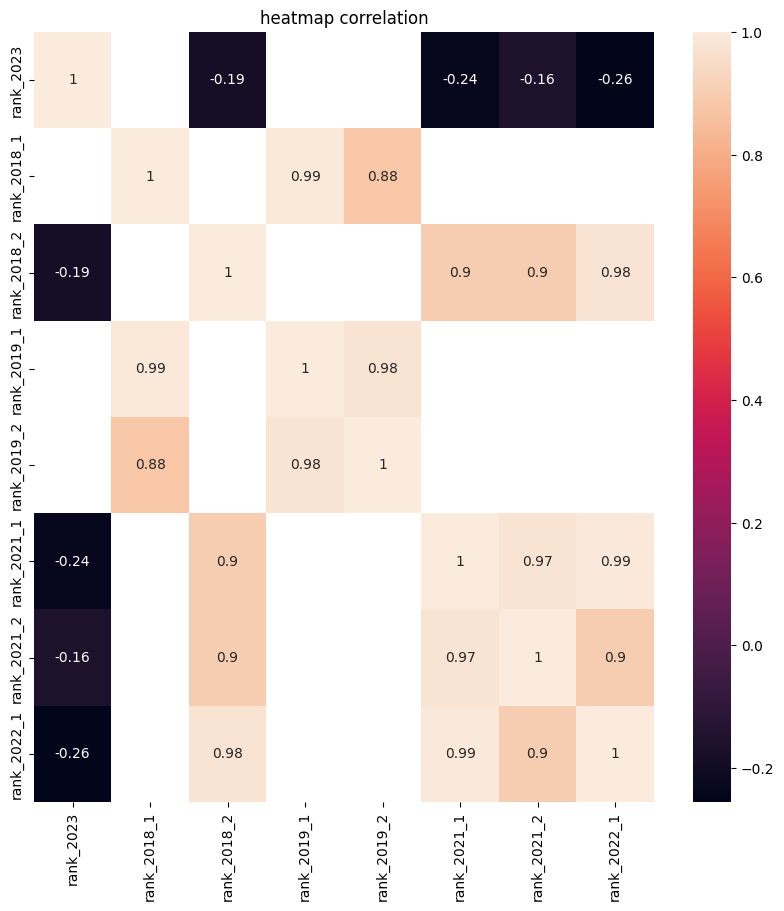

In [ ]:
plt.figure(figsize=(10,10))
plt.title('heatmap correlation')
sns.heatmap(df_new.corr(), annot=True)
plt.show()

###Uji Normalitas

In [ ]:
df_gabung.describe().T

,count,mean,std,min,25%,50%,75%,max
rank_2018_1,895.0,445.168715,252.317672,1.0,227.50,451.0,701.0,801.0
rank_2019_1,895.0,448.878212,254.463799,1.0,226.50,456.0,701.0,801.0
rank_2021_1,888.0,446.217342,252.917290,1.0,225.25,453.0,663.5,801.0
rank_2022_1,888.0,447.484234,253.551188,1.0,225.75,456.0,651.0,801.0
rank_2023,2130.0,57.169484,124.690455,0.0,0.00,0.0,0.0,493.0


In [ ]:
def outliers(df_gabung, feature):
    Q1 = df_gabung[feature].quantile(0.25)
    Q3 = df_gabung[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = outliers(df_gabung, "rank_2023")
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  0.0
Lower:  0.0


### Uji Linearitas

In [ ]:
df_gabung.corr()

,rank_2018_1,rank_2019_1,rank_2021_1,rank_2022_1,rank_2023
rank_2018_1,1.000000,0.989225,NaN,NaN,NaN
rank_2019_1,0.989225,1.000000,NaN,NaN,NaN
rank_2021_1,NaN,NaN,1.000000,0.991863,-0.240475
rank_2022_1,NaN,NaN,0.991863,1.000000,-0.255404
rank_2023,NaN,NaN,-0.240475,-0.255404,1.000000


<Axes: >

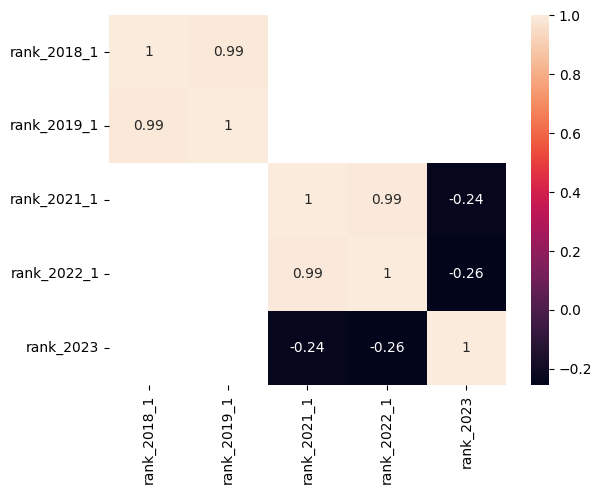

In [ ]:
sns.heatmap(df_gabung.corr(), annot=True)

Berdasarkan hasil di atas, dapat dilihat bahwa korelasi ranking tahun 2018-2023 ini adalah sangat kecil.

##Student Performance

In [ ]:
df_student = pd.read_csv('/content/student_performance_2022-2023.csv')

In [ ]:
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954
996,male,group C,high school,free/reduced,none,62,55,55,National Taiwan University of Science and Tech...,84614760
997,female,group C,high school,free/reduced,completed,59,71,65,University of Basel,57161539
998,female,group D,some college,standard,completed,68,78,77,Texas A&M University,22522604


###Check Null Values

In [ ]:
df_student.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
university                     0
student_id                     0
dtype: int64

Berdasarkan data tersebut, tidak terdapat null values di dalam data student performance.

### Check Irregular Values

In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   university                   1000 non-null   object
 9   student_id                   1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Type data pada data tersebut secara keseluruhan sudah sesuai.


In [ ]:
df_student['student_id'] = df_student['student_id'].astype(float).astype(str)
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   university                   1000 non-null   object
 9   student_id                   1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


### Check Duplicate Values

In [ ]:
df_student.duplicated().sum()

0

Tidak ada duplicate data yang melibatkan seluruh kolom pada data student performance.

### Heatmap

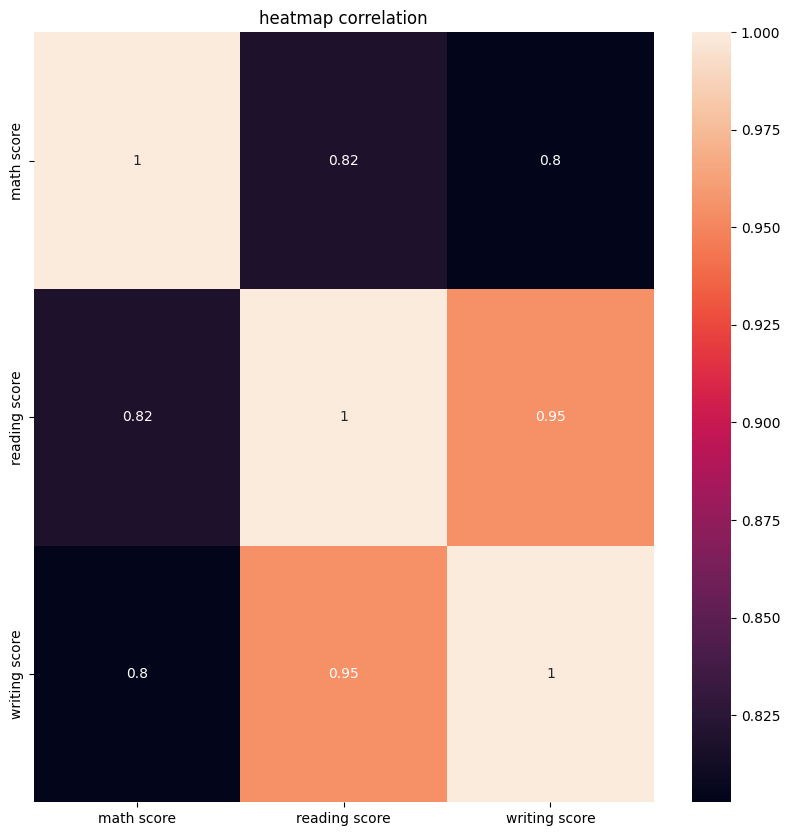

In [ ]:
plt.figure(figsize=(10,10))
plt.title('heatmap correlation')
sns.heatmap(df_student.corr(), annot=True)
plt.show()

korelasi paling besar pada data di atas adalah 0.95 antara writing score dan reading score.

### Uji Normalitas

#### math score

In [ ]:
df_student['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

<Axes: >

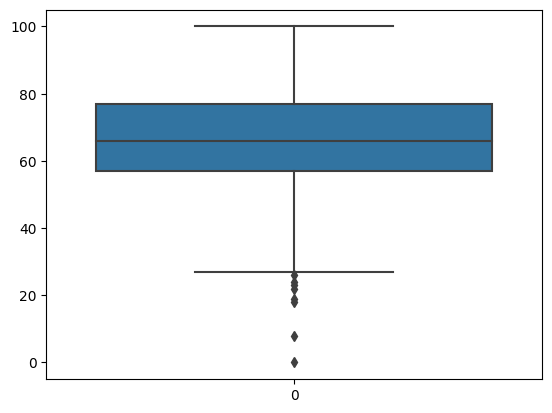

In [ ]:
sns.boxplot(df_student['math score'])

Walaupun math score banyak memiliki banyak outliers, akan tetapi karena data tersebut digunakan untuk melihat penilaian mahasiswa dan hubungannya dengan universitas, maka untuk nilai outliersnya tetap digunakan. Selain itu, rentang penilaian dalam batas normal (0-100).

#### reading score

In [ ]:
df_student['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

<Axes: >

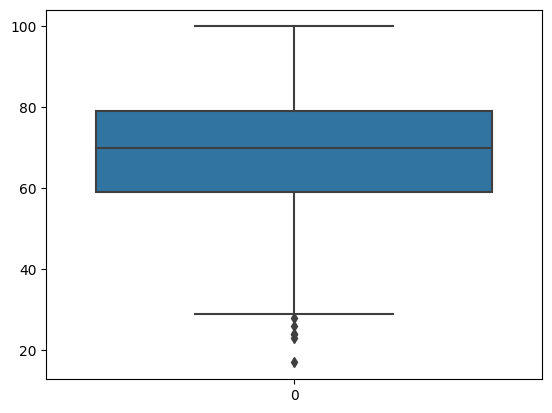

In [ ]:
sns.boxplot(df_student['reading score'])

Walaupun reading score banyak memiliki banyak outliers, akan tetapi karena data tersebut digunakan untuk melihat penilaian mahasiswa dan hubungannya dengan universitas, maka untuk nilai outliersnya tetap digunakan. Selain itu, rentang penilaian dalam batas normal (0-100).

#### writing score

In [ ]:
df_student['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

<Axes: >

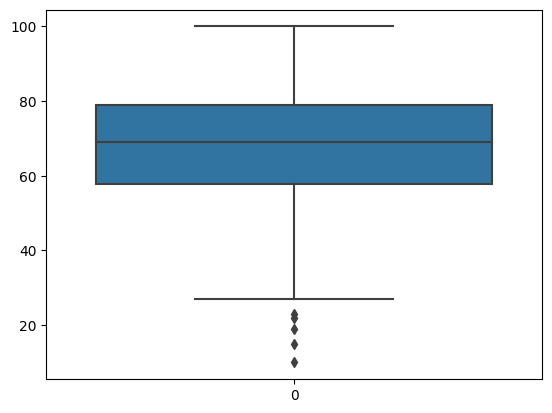

In [ ]:
sns.boxplot(df_student['writing score'])

Walaupun writing score banyak memiliki banyak outliers, akan tetapi karena data tersebut digunakan untuk melihat penilaian mahasiswa dan hubungannya dengan universitas, maka untuk nilai outliersnya tetap digunakan. Selain itu, rentang penilaian dalam batas normal (0-100).

### Uji Linearitas

In [ ]:
df_student.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

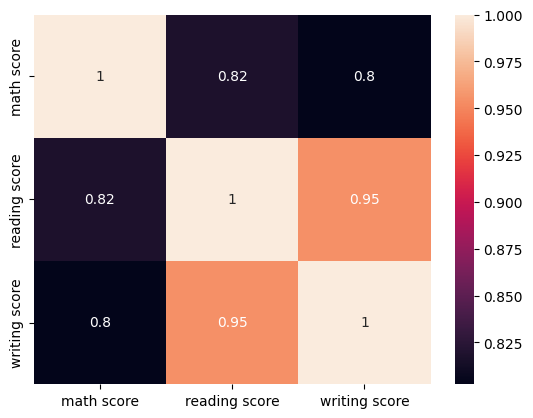

In [ ]:
sns.heatmap(df_student.corr(), annot=True)

berdasarkan analisis korelasi diatas, dapat disimpulkan bahwa writing score dan reading score memiliki hubungan yang sangat kuat yaitu 0,95 serta secara keseluruhan menunjukkan korelasi yang positif.



### Eksplorasi Lebih Lanjut

In [ ]:
df_student['total score'] = df_student['math score'] + df_student['reading score'] + df_student['writing score']
df_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,University of Essex,27330634.0,218
1,female,group C,some college,standard,completed,69,90,88,National Central University,92958629.0,247
2,female,group B,master's degree,standard,none,90,95,93,Université de Montpellier,31367409.0,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,Washington State University,97210441.0,148
4,male,group C,some college,standard,none,76,78,75,Keele University,99937559.0,229
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Université de Montpellier,70128954.0,282
996,male,group C,high school,free/reduced,none,62,55,55,National Taiwan University of Science and Tech...,84614760.0,172
997,female,group C,high school,free/reduced,completed,59,71,65,University of Basel,57161539.0,195
998,female,group D,some college,standard,completed,68,78,77,Texas A&M University,22522604.0,223


In [ ]:
best_student = df_student.sort_values(by='total score', ascending=False)
best_student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,university,student_id,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,Monash University,56712636.0,300
458,female,group E,bachelor's degree,standard,none,100,100,100,University of Wisconsin-Madison,93852536.0,300
962,female,group E,associate's degree,standard,none,100,100,100,Keio University,35523441.0,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,University of Oklahoma,99131099.0,299
179,female,group D,some high school,standard,completed,97,100,100,Swansea University,21672834.0,297
...,...,...,...,...,...,...,...,...,...,...,...
76,male,group E,some high school,standard,none,30,26,22,Case Western Reserve University,50449967.0,78
327,male,group A,some college,free/reduced,none,28,23,19,University of Bern,12208956.0,70
596,male,group B,high school,free/reduced,none,30,24,15,University of Wisconsin-Madison,77278678.0,69
980,female,group B,high school,free/reduced,none,8,24,23,Sumy State University,48739717.0,55


In [ ]:
best_student.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'university', 'student_id', 'total score'],
      dtype='object')

<Axes: xlabel='gender', ylabel='total score'>

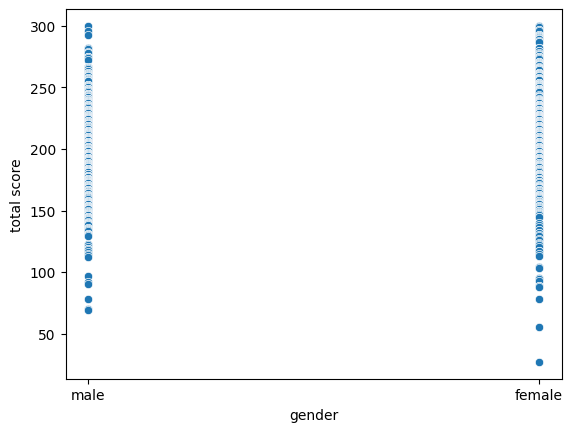

In [ ]:
sns.scatterplot(data=best_student, x="gender", y="total score")

<Axes: xlabel='race/ethnicity', ylabel='total score'>

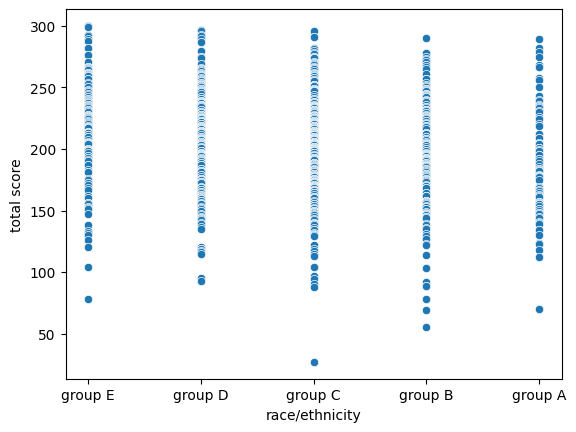

In [ ]:
sns.scatterplot(data=best_student, x="race/ethnicity", y="total score")

<Axes: xlabel='parental level of education', ylabel='total score'>

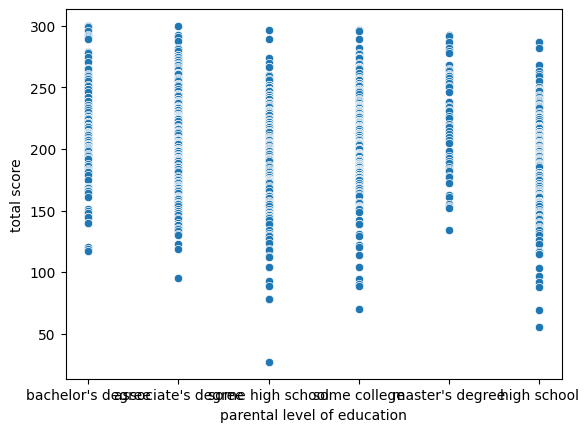

In [ ]:
sns.scatterplot(data=best_student, x="parental level of education", y="total score")

<Axes: xlabel='lunch', ylabel='total score'>

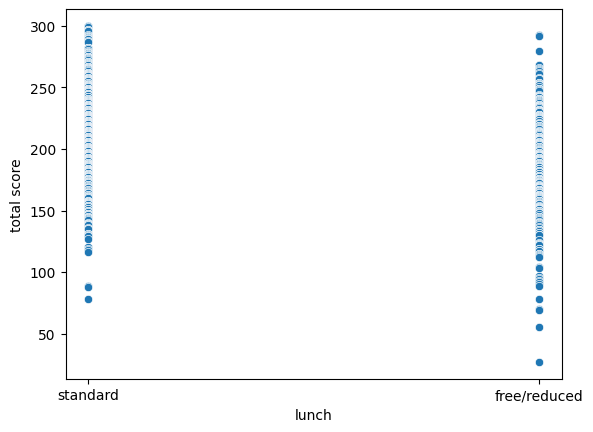

In [ ]:
sns.scatterplot(data=best_student, x="lunch", y="total score")

<Axes: xlabel='test preparation course', ylabel='total score'>

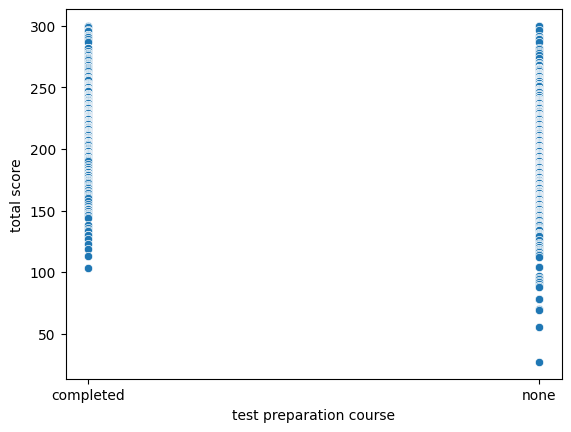

In [ ]:
sns.scatterplot(data=best_student, x="test preparation course", y="total score")

###Uji Heteroskedastisitas

In [ ]:
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro
from sklearn import preprocessing
import statsmodels.api as sm

In [ ]:
best_student = pd.get_dummies(best_student, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

In [ ]:
best_student

,math score,reading score,writing score,university,student_id,total score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
916,100,100,100,Monash University,56712636.0,300,1,0,0,0,1,1,0,0,0,0,1,0
458,100,100,100,University of Wisconsin-Madison,93852536.0,300,0,0,0,0,1,1,0,0,0,0,1,1
962,100,100,100,Keio University,35523441.0,300,0,0,0,0,1,0,0,0,0,0,1,1
114,99,100,100,University of Oklahoma,99131099.0,299,0,0,0,0,1,1,0,0,0,0,1,0
179,97,100,100,Swansea University,21672834.0,297,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,30,26,22,Case Western Reserve University,50449967.0,78,1,0,0,0,1,0,0,0,0,1,1,1
327,28,23,19,University of Bern,12208956.0,70,1,0,0,0,0,0,0,0,1,0,0,1
596,30,24,15,University of Wisconsin-Madison,77278678.0,69,1,1,0,0,0,0,1,0,0,0,0,1
980,8,24,23,Sumy State University,48739717.0,55,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
fasilitas = best_student[['lunch_standard', 'test preparation course_none', 'total score' ]]

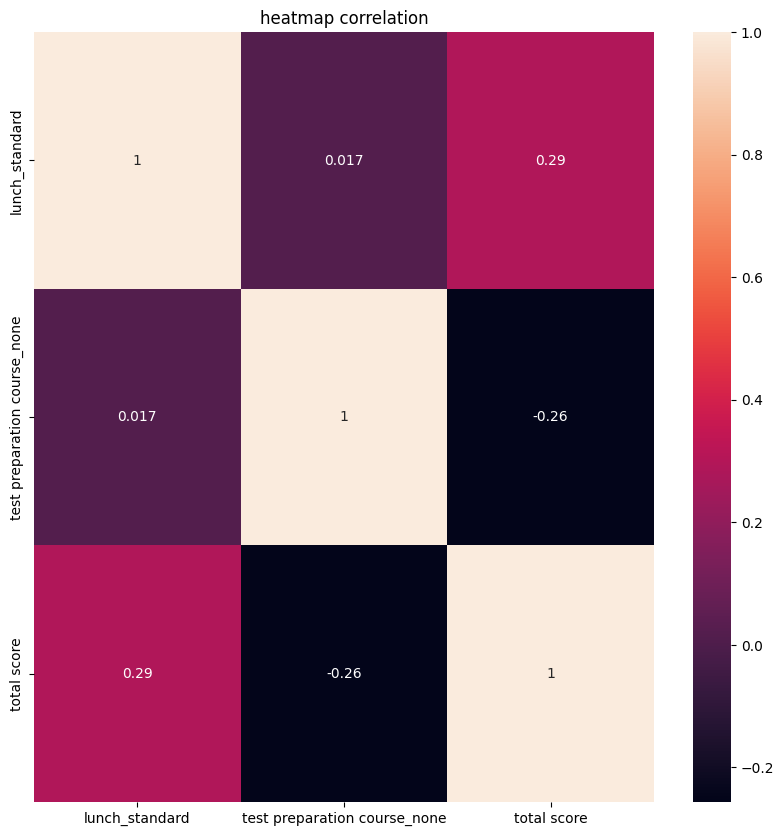

In [ ]:
plt.figure(figsize=(10,10))
plt.title('heatmap correlation')
sns.heatmap(fasilitas.corr(), annot=True)
plt.show()

Berdasarkan data di atas, dapat disimpulkan bahwa korelasi antara student yang fasilitas lunch standard dengan student yang tidak mengikuti test preparation course sangat rendah terhadap prestasi akademik (total score) dari student.

In [ ]:
X = best_student[["lunch_standard", "test preparation course_none"]]
y = best_student["total score"]

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,lunch_standard,test preparation course_none
916,1.0,1,0
458,1.0,1,1
962,1.0,1,1
114,1.0,1,0
179,1.0,1,0
...,...,...,...
76,1.0,1,1
327,1.0,0,1
596,1.0,0,1
980,1.0,0,1


In [ ]:
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            total score   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     89.78
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.40e-36
Time:                        08:59:31   Log-Likelihood:                -5091.5
No. Observations:                1000   AIC:                         1.019e+04
Df Residuals:                     997   BIC:                         1.020e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# Uji Asumsi Independen dan Heteroskedastisitas
# opsional
residual = result.resid

In [ ]:
residual

916     72.363125
458     95.702322
962     95.702322
114     71.363125
179     69.363125
          ...    
76    -126.297678
327   -107.984691
596   -108.984691
980   -122.984691
59    -150.984691
Length: 1000, dtype: float64

In [ ]:
het_result = het_white(residual, X)

print('LM stat = {0:.3f}'.format(het_result[0]))
print('LM p-value = {0:.3f}'.format(het_result[1]))
print('F stat = {0:.3f}'.format(het_result[2]))
print('F p-value = {0:.3f}'.format(het_result[3]))

LM stat = 5.995
LM p-value = 0.112
F stat = 2.002
F p-value = 0.112


Berdasarkan hasil uji heteroskedastisitas dengan menggunakan metode White's Lagrange Multiplier (LM), didapatkan bahwa nilai statistik LM adalah 5.995 dan p-value adalah 0.112.

Jika menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value (0.112) lebih besar dari tingkat signifikansi tersebut. Oleh karena itu, tidak cukup bukti untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model.

Selain itu, juga diperoleh nilai F stat sebesar 2.002 dan F p-value sebesar 0.112. Dalam kasus ini, karena nilai F p-value juga lebih besar dari threshold 0.05, maka dapat disimpulkan bahwa tidak terdapat bukti yang cukup untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model dengan menggunakan uji White's Lagrange Multiplier.

In [ ]:
# Uji Asumsi Normalitas Residual
# kstest sering digunakan

model_residual = residual
kstest(model_residual, 'norm')

KstestResult(statistic=0.4742759129771481, pvalue=4.583755004292146e-207, statistic_location=2.676112044896513, statistic_sign=-1)

Angka 4.583e-207 yang muncul dalam hasil K-S test sebenarnya merupakan notasi ilmiah atau notasi eksponensial dari bilangan riil yang sangat kecil, yaitu 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000458375500429214.

Dalam praktiknya, angka tersebut sangat kecil hingga hampir nol, sehingga dapat dianggap sebagai bukti yang kuat untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal.

Meskipun residual tidak memenuhi asumsi normalitas, hal tersebut tidak selalu berarti bahwa model regresi tidak dapat digunakan. Terkadang, meskipun asumsi tidak terpenuhi, model regresi masih dapat memberikan hasil yang baik jika nilai residual masih terdistribusi secara seragam dan memiliki varians yang konstan. Namun, jika asumsi normalitas tidak terpenuhi dan juga terdapat indikasi heteroskedastisitas pada residual, maka hasil regresi dapat menjadi tidak valid dan interpretasi hasilnya juga menjadi tidak dapat diandalkan.

In [ ]:
shapiro(model_residual)

ShapiroResult(statistic=0.9958692789077759, pvalue=0.008865557610988617)

Berdasarkan hasil uji normalitas residual menggunakan metode Shapiro-Wilk test, didapatkan nilai statistik sebesar 0.9958692789077759 dan p-value sebesar 0.00886555761098861.

Jika menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value lebih besar dari tingkat signifikansi tersebut. Oleh karena itu, tidak cukup bukti untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal. Hal ini menunjukkan bahwa residual dapat dikatakan cukup terdistribusi normal.

Namun, perlu diperhatikan bahwa hasil uji normalitas dapat bervariasi tergantung pada metode yang digunakan. Oleh karena itu, sebaiknya dilakukan beberapa uji normalitas lainnya seperti K-S test, Anderson-Darling test, atau uji grafis seperti Q-Q plot untuk memastikan apakah residual memenuhi asumsi normalitas atau tidak.

<Axes: ylabel='Density'>

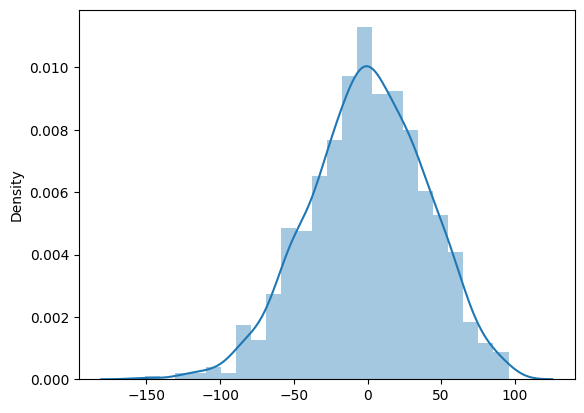

In [ ]:
sns.distplot(residual, kde = True)

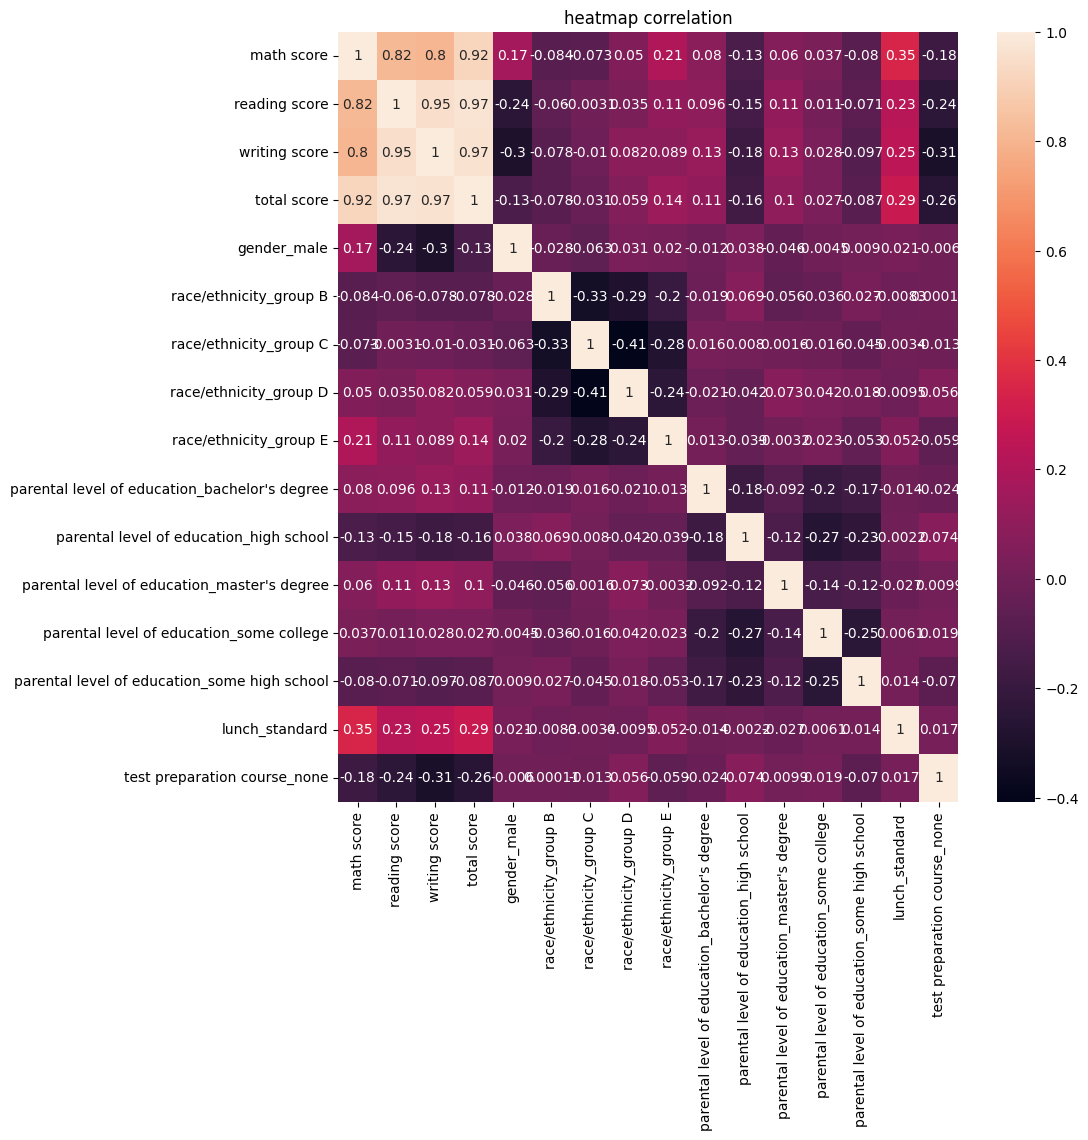

In [ ]:
plt.figure(figsize=(10,10))
plt.title('heatmap correlation')
sns.heatmap(best_student.corr(), annot=True)
plt.show()

### Top 3 Student

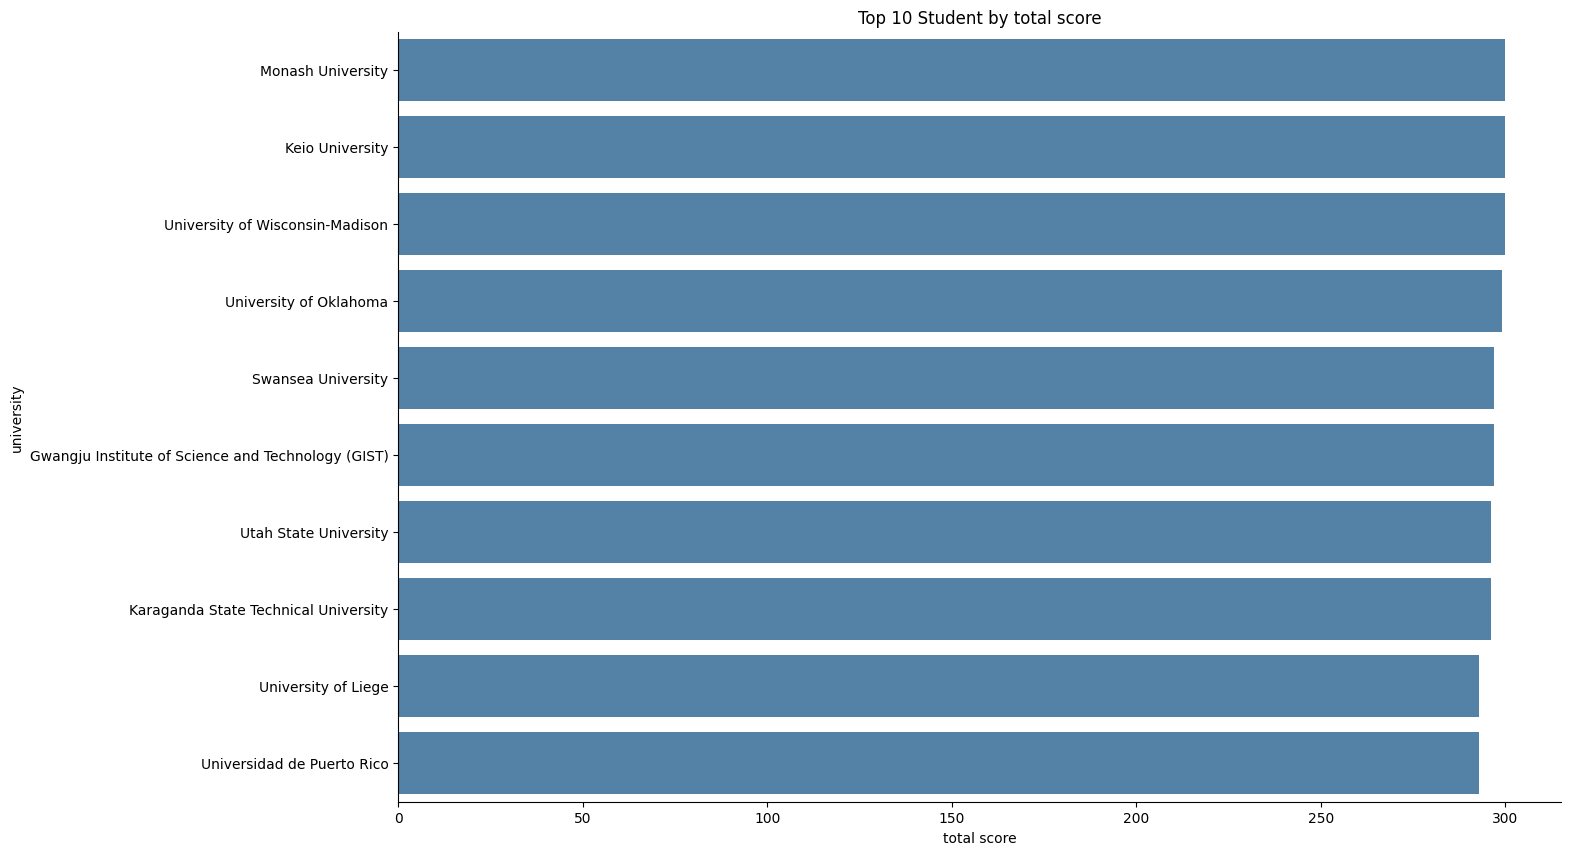

In [ ]:
nominee = student.sort_values(by='total score', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 Student by total score')
sns.barplot(data=nominee, x='total score', y='university',
            color='steelblue', )
sns.despine()
plt.show()

In [ ]:
student = best_student[['university', 'student_id', 'total score']]
student.sort_values('total score', ascending=False)

,university,student_id,total score
916,Monash University,56712636.0,300
962,Keio University,35523441.0,300
458,University of Wisconsin-Madison,93852536.0,300
114,University of Oklahoma,99131099.0,299
179,Swansea University,21672834.0,297
...,...,...,...
76,Case Western Reserve University,50449967.0,78
327,University of Bern,12208956.0,70
596,University of Wisconsin-Madison,77278678.0,69
980,Sumy State University,48739717.0,55


In [ ]:
nominee = student.sort_values(by='total score', ascending=False).iloc[:3,0]

print('Top 3 Student :')
for i in nominee :
  print('-',i)

print()

Top 3 Student :
- Monash University
- Keio University
- University of Wisconsin-Madison



###Bottom 3 Student

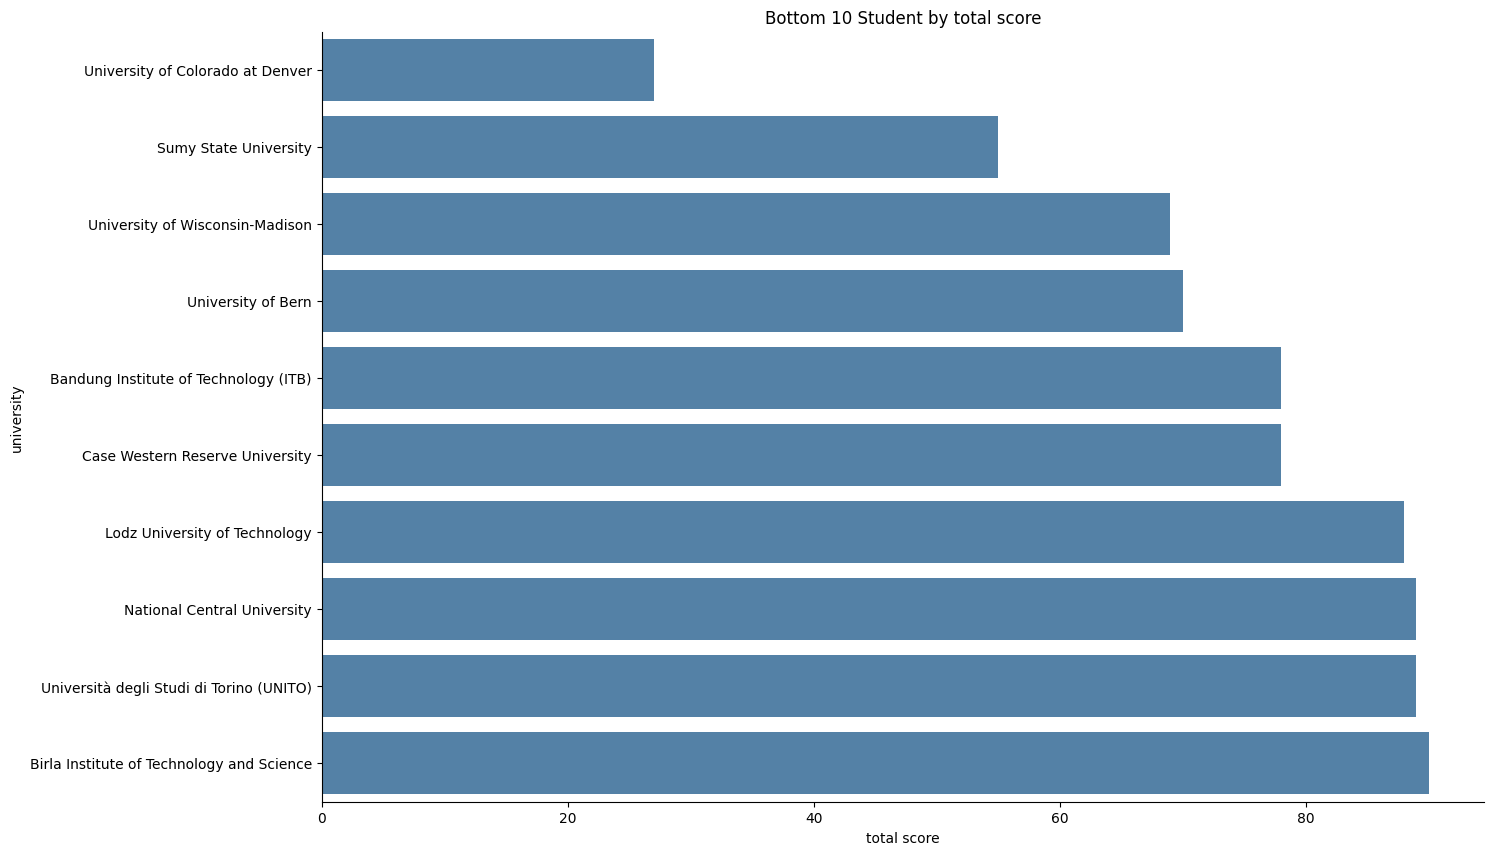

In [ ]:
nominee = student.sort_values(by='total score', ascending=True).head(10)

plt.figure(figsize=(15,10))
plt.title('Bottom 10 Student by total score')
sns.barplot(data=nominee, x='total score', y='university',
            color='steelblue', )
sns.despine()
plt.show()

In [ ]:
student = best_student[['university', 'student_id', 'total score']]
student.sort_values('total score', ascending=True)

,university,student_id,total score
59,University of Colorado at Denver,87524132.0,27
980,Sumy State University,48739717.0,55
596,University of Wisconsin-Madison,77278678.0,69
327,University of Bern,12208956.0,70
17,Bandung Institute of Technology (ITB),43861545.0,78
...,...,...,...
179,Swansea University,21672834.0,297
114,University of Oklahoma,99131099.0,299
962,Keio University,35523441.0,300
458,University of Wisconsin-Madison,93852536.0,300


In [ ]:
nominee = student.sort_values(by='total score', ascending=True).iloc[:3,0]

print('Bottom 3 Student :')
for i in nominee :
  print('-',i)

print()

Bottom 3 Student :
- University of Colorado at Denver
- Sumy State University
- University of Wisconsin-Madison



#Modeling

##Universitas and Student Performance

In [ ]:
df_gabung.sort_values('rank_2023')

,university,rank_2018_1,rank_2019_1,rank_2021_1,rank_2022_1,rank_2023
1064,UNIVERSITÉ PANTHÉON-ASSAS (PARIS 2),551.0,NaN,NaN,NaN,0.0
1428,UNIVERSITY OF ULSAN,NaN,501.0,NaN,NaN,0.0
1427,UNIVERSITÄT HOHENHEIM,NaN,495.0,NaN,NaN,0.0
1426,VILNIUS UNIVERSITY,NaN,488.0,NaN,NaN,0.0
1425,KAZAKH NATIONAL PEDAGOGICAL UNIVERSITY ABAI,NaN,481.0,NaN,NaN,0.0
...,...,...,...,...,...,...
488,Bond University,NaN,NaN,443.0,442.0,489.0
489,UNESP,NaN,NaN,NaN,NaN,490.0
490,Ko University,NaN,NaN,NaN,NaN,491.0
491,Imam Abdulrahman Bin Faisal University (IAU) (...,NaN,NaN,NaN,NaN,492.0


In [ ]:
student_university = pd.merge(best_student[['university', 'student_id', 'math score', 'reading score', 'writing score', 'total score']], df_gabung[['university', 'rank_2023']], on='university')
student_university.sort_values(by='total score', ascending=False)

,university,student_id,math score,reading score,writing score,total score,rank_2023
0,Monash University,56712636.0,100,100,100,300,57.0
1,University of Wisconsin-Madison,93852536.0,100,100,100,300,83.0
3,Keio University,35523441.0,100,100,100,300,194.0
4,University of Oklahoma,99131099.0,99,100,100,299,0.0
5,Swansea University,21672834.0,97,100,100,297,409.0
...,...,...,...,...,...,...,...
998,Case Western Reserve University,50449967.0,30,26,22,78,176.0
531,University of Bern,12208956.0,28,23,19,70,120.0
2,University of Wisconsin-Madison,77278678.0,30,24,15,69,83.0
847,Sumy State University,48739717.0,8,24,23,55,0.0


####Uji Linearitas

In [ ]:
student_university.corr()

,math score,reading score,writing score,total score,rank_2023
math score,1.000000,0.817580,0.802642,0.918746,-0.025498
reading score,0.817580,1.000000,0.954598,0.970331,-0.003342
writing score,0.802642,0.954598,1.000000,0.965667,0.001143
total score,0.918746,0.970331,0.965667,1.000000,-0.009774
rank_2023,-0.025498,-0.003342,0.001143,-0.009774,1.000000


<Axes: >

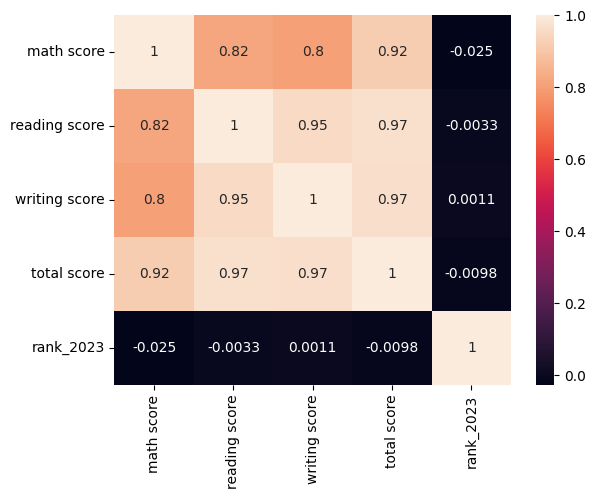

In [ ]:
sns.heatmap(student_university.corr(), annot=True)

berdasarkan analisis korelasi diatas, dapat disimpulkan bahwa korelasi antara reading score dan writing score dengan total score. Korelasi terlihat sangat tinggi di reading score dan writing score terhadap total score dengan nilai korelasi 0.97. Akan tetapi tidak ada korelasi antara performa student dengan rank_2023.



####Eksplorasi Lebih Lanjut

<Axes: xlabel='math score', ylabel='rank_2023'>

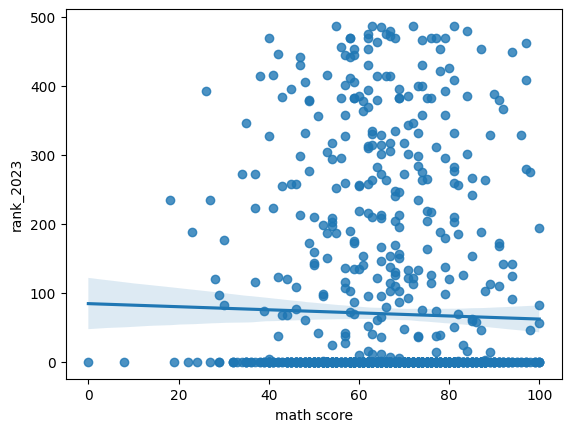

In [ ]:
sns.regplot(data=student_university, x="math score", y="rank_2023")

<Axes: xlabel='reading score', ylabel='rank_2023'>

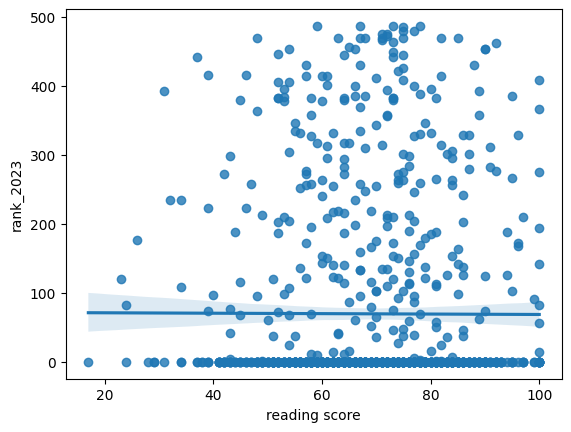

In [ ]:
sns.regplot(data=student_university, x="reading score", y="rank_2023")

<Axes: xlabel='writing score', ylabel='rank_2023'>

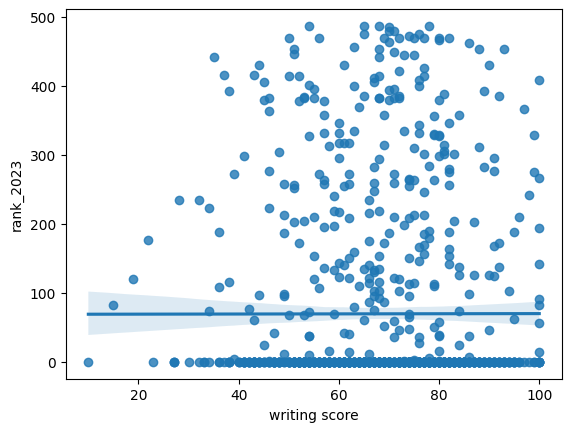

In [ ]:
sns.regplot(data=student_university, x="writing score", y="rank_2023")

<Axes: xlabel='total score', ylabel='rank_2023'>

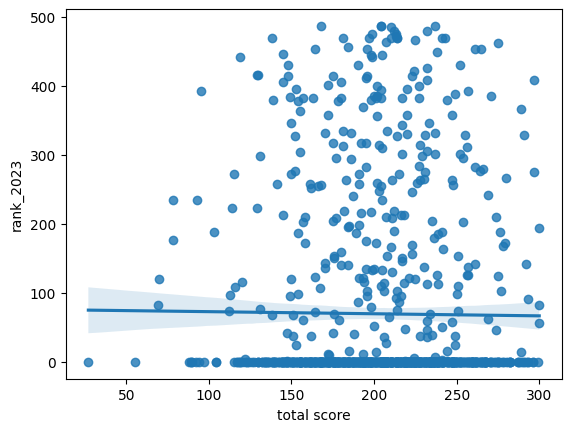

In [ ]:
sns.regplot(data=student_university, x="total score", y="rank_2023")

####Uji Heteroskedastisitas

In [ ]:
X = student_university[['math score', 'reading score', 'writing score']]
y = student_university['rank_2023']

In [ ]:
X = add_constant(X)

In [ ]:
X

,const,math score,reading score,writing score
0,1.0,100,100,100
1,1.0,100,100,100
2,1.0,30,24,15
3,1.0,100,100,100
4,1.0,99,100,100
...,...,...,...,...
995,1.0,29,40,44
996,1.0,36,29,27
997,1.0,35,28,27
998,1.0,30,26,22


In [ ]:
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              rank_2023   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6544
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.580
Time:                        08:59:37   Log-Likelihood:                -6307.4
No. Observations:                1000   AIC:                         1.262e+04
Df Residuals:                     996   BIC:                         1.264e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            76.9321     20.712      3.714

In [ ]:
# Uji Asumsi Independen dan Heteroskedastisitas
# opsional
residual = result.resid

In [ ]:
residual

0       -7.590193
1       18.409807
2       18.163356
3      129.409807
4      -65.231571
          ...    
995     15.600563
996    -67.688828
997    -68.399484
998    107.191255
999    -81.626738
Length: 1000, dtype: float64

In [ ]:
het_result = het_white(residual, X)

print('LM stat = {0:.3f}'.format(het_result[0]))
print('LM p-value = {0:.3f}'.format(het_result[1]))
print('F stat = {0:.3f}'.format(het_result[2]))
print('F p-value = {0:.3f}'.format(het_result[3]))

LM stat = 2.369
LM p-value = 0.984
F stat = 0.261
F p-value = 0.985


In [ ]:
# Uji Asumsi Normalitas Residual
# kstest sering digunakan

model_residual = residual
kstest(model_residual, 'norm')

KstestResult(statistic=0.7459998633816153, pvalue=0.0, statistic_location=-5.141029757747688, statistic_sign=1)

Berdasarkan hasil uji heteroskedastisitas dengan menggunakan metode White's Lagrange Multiplier (LM), didapatkan bahwa nilai statistik LM adalah 2.369 dan p-value adalah 0.984.

Jika menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value (0.984) lebih besar dari tingkat signifikansi tersebut. Oleh karena itu, tidak cukup bukti untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model.

Selain itu, juga diperoleh nilai F stat sebesar 0.261 dan F p-value sebesar 0.985. Dalam kasus ini, karena nilai F p-value juga lebih besar dari threshold 0.05, maka dapat disimpulkan bahwa tidak terdapat bukti yang cukup untuk menolak hipotesis nol bahwa tidak ada heteroskedastisitas dalam model dengan menggunakan uji White's Lagrange Multiplier.

Angka pValue dari KsTest adalah 0.0

Dalam praktiknya, angka tersebut  dapat dianggap sebagai bukti yang kuat untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal.

Meskipun residual tidak memenuhi asumsi normalitas, hal tersebut tidak selalu berarti bahwa model regresi tidak dapat digunakan. Terkadang, meskipun asumsi tidak terpenuhi, model regresi masih dapat memberikan hasil yang baik jika nilai residual masih terdistribusi secara seragam dan memiliki varians yang konstan. Namun, jika asumsi normalitas tidak terpenuhi dan juga terdapat indikasi heteroskedastisitas pada residual, maka hasil regresi dapat menjadi tidak valid dan interpretasi hasilnya juga menjadi tidak dapat diandalkan.

In [ ]:
shapiro(model_residual)

ShapiroResult(statistic=0.6217914819717407, pvalue=3.592929262528831e-42)

Berdasarkan hasil uji normalitas residual menggunakan metode Shapiro-Wilk test, didapatkan nilai statistik sebesar 0.6217914819717407 dan p-value sebesar 0.0000000000000000000000000000000000000000003592929262528831.

Jika menggunakan threshold 0.05 sebagai tingkat signifikansi, maka dapat dinyatakan bahwa p-value lebih kecil dari tingkat signifikansi tersebut. Oleh karena itu, cukup bukti untuk menolak hipotesis nol bahwa residual mengikuti distribusi normal. Hal ini menunjukkan bahwa residual dapat dikatakan tidak terdistribusi normal.

Namun, perlu diperhatikan bahwa hasil uji normalitas dapat bervariasi tergantung pada metode yang digunakan. Oleh karena itu, sebaiknya dilakukan beberapa uji normalitas lainnya seperti K-S test, Anderson-Darling test, atau uji grafis seperti Q-Q plot untuk memastikan apakah residual memenuhi asumsi normalitas atau tidak.

<Axes: ylabel='Density'>

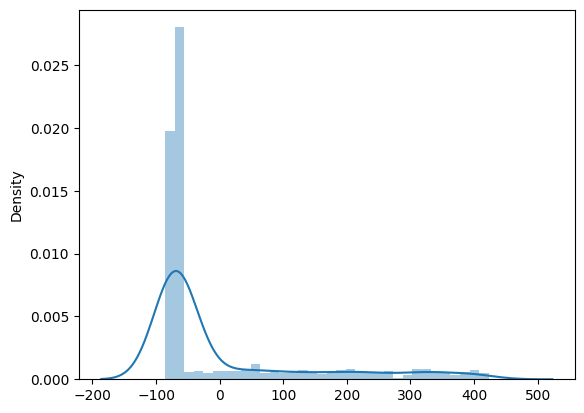

In [ ]:
sns.distplot(residual, kde = True)

Berdasarkan tabel di atas, dapat diketahui bahwa performa student (math score, reading score dan writing score) tidak memiliki hubungan dengan prediksi ranking universitas, hal ini dapat terlihat dari student yang memiliki prestasi secara akademik adalah student yang berasal bukan dari universitas yang memiliki ranking tertinggi.

##Regresi Linear Universitas dan Student Performance

In [ ]:
X = student_university[['math score', 'reading score', 'writing score']]
Y = student_university['rank_2023']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(800, 3) (800,) (200, 3) (200,)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
example = [[50, 100, 75]]
output = model.predict(example)
output

array([93.60154752])

In [ ]:
X_test

,math score,reading score,writing score
521,65,78,82
737,59,72,70
740,59,71,65
660,55,59,59
411,67,84,86
...,...,...,...
408,63,73,68
332,91,73,80
208,67,79,84
613,58,49,42


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([82.82004353, 79.21653091, 75.89474107, 73.65184244, 84.57801098,
       82.54617689, 71.15950866, 62.2751477 , 59.24535113, 80.68494299,
       79.54445687, 73.36438083, 87.40368898, 78.94840309, 74.73856622,
       66.45479069, 78.46889017, 75.03841563, 68.25201534, 70.66883867,
       65.35809342, 63.79518122, 79.20293594, 71.23469856, 79.11779612,
       61.47376819, 75.53753141, 58.48776047, 65.81827255, 73.82364979,
       74.9550726 , 84.79572452, 71.20329752, 81.10283741, 79.90590121,
       65.62622124, 59.56300662, 79.3276535 , 66.41100184, 71.72174708,
       61.85422577, 76.13026069, 70.61630705, 54.95823059, 85.06294216,
       81.0844138 , 69.16481443, 77.46309511, 53.83646072, 62.12267414,
       60.35773714, 75.88358399, 83.64075682, 71.96241589, 75.42520165,
       68.40328175, 74.17603082, 62.36634689, 62.6377992 , 65.69808664,
       78.40608808, 84.95093296, 74.2029002 , 59.61221374, 68.71340163,
       62.4907439 , 64.53949746, 66.12021573, 68.91207837, 84.51

In [ ]:
Y_test

521      0.0
737      0.0
740    135.0
660      0.0
411      7.0
       ...  
408    487.0
332    379.0
208    137.0
613      0.0
78       0.0
Name: rank_2023, Length: 200, dtype: float64

#Evaluation Regresi Linear (student Performance and university)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Score is:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 97.76383781683028
Mean Squared Error: 15917.157675935478
Root Mean Squared Error: 126.16321839559848
R Squared Score is: -0.01077501245758028


**Mean Absolute Error** memiliki nilai 97.76383781683028. Performa model Regresi Linear ini kurang baik karena nilai dari **Mean Absolute Error** sendiri sangat besar.

**Mean Squared Error ** memiliki nilai 15917.157675935478. Performa model Regresi Linear jika dilihat dari nilai **Mean Squared Error** ini dinilai kurang karena nilainya yang sangat besar.

**Root Mean Squared Error** memiliki nilai 126.16321839559848. Performa model Regresi Linear dilihat dari nilai **Roor Mean Squared Error** ini dinilai kurang karena nilainya sangat besar.

**R Squared Score** memiliki nilai -0.01077501245758028. Nilai tersebut sangat menjelaskan bahwa model ini tidak memiliki kecocokan yang kurang baik dengan data dan tidak dapat menjelaskan variasi yang ada dalam data.

**Kesimpulan** Berdasarkan hasil di atas, dapat disimpulkan bahwa model yang digunakan kurang baik dalam memprediksi data.

**Recomendation**

- Memberikan beasiswa bagi top 3 student/merekrut top 3 student setelah lulus.
- Memberikan beasiswa pengembangan universitas bagi universitas dari top 3 student untuk mengembangkan sarana, fasilitas, pelayanan universitas agar dapat selaras dengan prestasi akademik student. Serta memberikan pelatihan akademik untuk penyeimbangan akademik agar akademik student lain yang tidak masuk ke dalam top 3.
- Memberikan pelatihan lanjutan bagi top 3 universitas terutama dalam pelatihan akademik agar akademik student dapat selaras dengan ranking yang diperoleh universitas.
- Outsourching perusahaan diberikan kepada universitas dengan bottom 3 student (bagi universitas yang studentnya tidak ada yang masuk ke dalam top 3 student).